In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib


In [5]:
# Load the dataset
file_path = 'german_credit_data.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Inspect the dataset
print(data.head())
print(data.info())


   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 

In [7]:
# Drop the redundant column
data.drop(columns=["Unnamed: 0"], inplace=True)

# Handle missing values in 'Saving accounts' and 'Checking account'
data["Saving accounts"].fillna("unknown", inplace=True)
data["Checking account"].fillna("unknown", inplace=True)

# One-hot encode categorical variables
data_encoded = pd.get_dummies(
    data,
    columns=["Sex", "Housing", "Saving accounts", "Checking account", "Purpose"],
    drop_first=True,
)

# Inspect the processed data
print(data_encoded.head())


   Age  Job  Credit amount  Duration  Sex_male  Housing_own  Housing_rent  \
0   67    2           1169         6      True         True         False   
1   22    2           5951        48     False         True         False   
2   49    1           2096        12      True         True         False   
3   45    2           7882        42      True        False         False   
4   53    2           4870        24      True        False         False   

   Saving accounts_moderate  Saving accounts_quite rich  Saving accounts_rich  \
0                     False                       False                 False   
1                     False                       False                 False   
2                     False                       False                 False   
3                     False                       False                 False   
4                     False                       False                 False   

   ...  Checking account_moderate  Checking accoun

C:\Users\sreep\AppData\Local\Temp\ipykernel_30448\739778954.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Saving accounts"].fillna("unknown", inplace=True)
C:\Users\sreep\AppData\Local\Temp\ipykernel_30448\739778954.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [9]:
# Define features (X) and target (y)
X = data_encoded.drop(columns=["Credit amount"])  # Features
y = (data_encoded["Credit amount"] > 2000).astype(int)  # Target (1: High Credit, 0: Low Credit)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing completed!")


Data preprocessing completed!


In [11]:
# Train the Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

print("Model training completed!")


Model training completed!


In [13]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)


Model Accuracy: 0.775
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75        91
           1       0.80      0.79      0.79       109

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.78      0.78      0.78       200

Confusion Matrix:
 [[69 22]
 [23 86]]
ROC-AUC Score: 0.8060288335517694


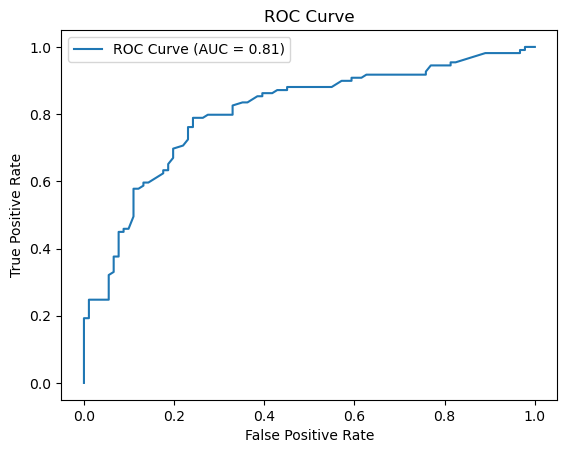

In [15]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [17]:
# Save the trained model
joblib.dump(model, "credit_scoring_model.pkl")
print("Model saved as 'credit_scoring_model.pkl'")


Model saved as 'credit_scoring_model.pkl'
